In [1]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
#Data
data_c = {
    "improved": [9, 11, 4, 21, 12, 0],
    "not_improved": [6, 7, 6, 18, 17, 10] 
}

#Calculated posterior distribution
posterior_c = stats.beta(58, 65)

#Function to create replicated data from the posterior
def create_replicate(data, pos): 
    #Drawing a posterior value of the probability
    p = pos.rvs(size=1)
    samples = []
    #To make the replicated data as close as the original data, draw samples 
    #from the likelihood with the same number of tested individuals
    #(improved+not_improved) in each trials (assuming a non-hierarchial 
    #model with the same probability, drawn above)
    for i in range(len(data['improved'])):
        l = stats.binom(n=data['improved'][i]+data['not_improved'][i], p=p)
        sample = l.rvs(size=1)
        samples.append(sample)
    return np.array(samples)


#Calculating the p-value: the proportion of the test statistics of the 
#replicated data that is bigger than the test statistic of the real data
def p_value(replicate, real):
    dumb = [replicate[i] > real for i in range(len(replicate))]
    print('P-value:', sum(dumb)/len(dumb))

P-value: [0.999]


<IPython.core.display.Javascript object>


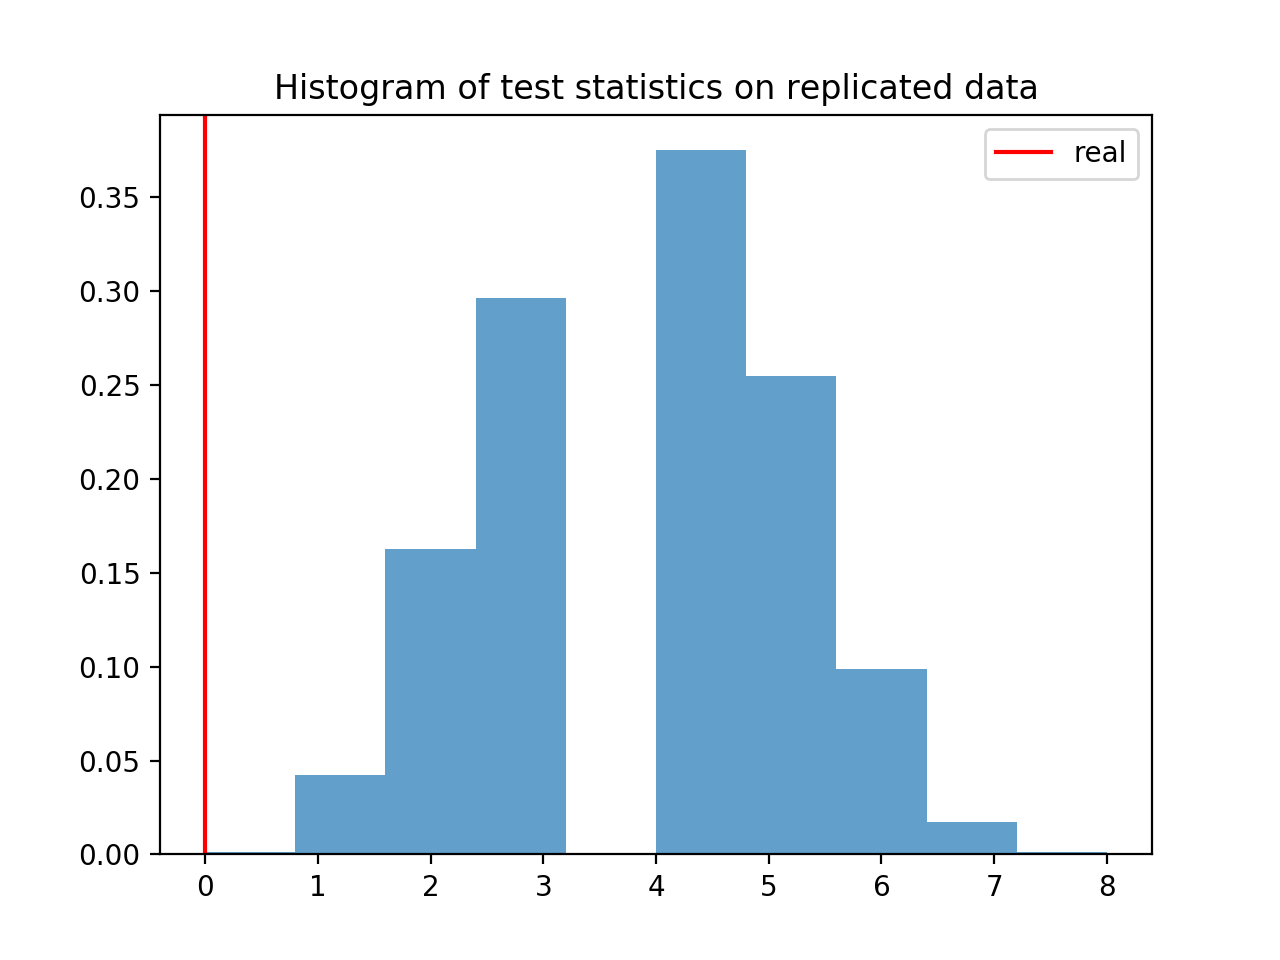

In [11]:
#First test statistics: the min of the dataset
def test_statistic_1(data):
    return min(data)

#Calculating the test statistics for the replicated data
rep = []
for _ in range(1000):
    generated = create_replicate(data_c,posterior_c)
    rep.append(test_statistic_1(generated))
    

#Plotting the replicated data statistics and the real data statistics    
p_value(rep, test_statistic_1(data_c['improved']))
plt.hist(np.array(rep), density=True, alpha=0.7)
plt.axvline(x=test_statistic_1(data_c['improved']), color='r', label='real')
plt.title('Histogram of test statistics on replicated data')
plt.legend()
plt.show()   

Using the min value of the number of improved individuals, the p-value indicates that, statistically, it's very unlikely to observe a real dataset as we have observed given that the underlying data generating mechanisim is our current non-hierarchical model. This suggests an inherent deficency in our assumption that each trial has the same probability of success (or at least has its probability of success being drawn fron the same beta distribution), and in reality this is probably true since we are modeling 9 different studies with potentially different methodologies, controls for hidden variables or even measurement techniques. One way to improve the model might be using the hierarchical model where we assumes each study has a different probability of success (placing a prior on the beta distribution) as we did in the class. This could be more effective in modeling the "spread" of the posterior predictive, making the min of our model resembles the real data better. 